In [1]:
import scipy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from ipywidgets import widgets

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
res6 = pd.read_csv("result6weekxboost3.csv", sep=",")
composed2 = []

for row in res6.itertuples():
    newrow = []
    idx, id, y = row
    region, date, hour, pred_hour = id.split("_")
    d = map(int, date.split("-"))
    newrow.append(d[0])
    newrow.append(d[1])
    newrow.append(d[2])
    #newrow = map(int, date.split("-"))
    newrow.append(int(hour))
    newrow.append(int(pred_hour))
    newrow.append(int(region))
    newrow.append(y)
    composed2.append(newrow)
composed2 = pd.DataFrame(data=composed2, columns=["year", "month", "day", "hour", "pred_hour", "region", "y"])
#print composed2

for i in range(6):
    num = i+1
    newd = composed2[composed2['pred_hour']==num]
    d = newd['y']

    if i==0: 
        dmain = pd.DataFrame(data=newd, columns=["year", "month", "day", "hour", "region"])
    ypred = 'pred_'+str(num)
    dmain[ypred] = newd['y'].values
    
reg102 = pd.read_csv("102_regions.csv", sep=",",header=None) 
file_june = ['agrig_yellow_tripdata_2016-05.csv', 'agrig_yellow_tripdata_2016-06.csv']
data_all1 = pd.DataFrame()
dataMain = pd.DataFrame()

j=0
for f in file_june:
    k=0
    data_h = pd.DataFrame()
    data = pd.read_csv(f, sep=",", index_col=False) 
    dataMain = pd.concat([dataMain, data])

dataMain = dataMain.drop('Unnamed: 0', 1)

for r in reg102[1].index:  
    data_reg = pd.DataFrame(data = dataMain[dataMain['region']==reg102[1][r]])
    data_all1 = pd.concat([data_all1, data_reg])

yt = data_all1['count of trips']
for num in range(6):        
    a = np.roll(yt, -(num+1))
    colname = 'y_Tplus'+str(num+1)
    data_all1[colname] = a

ind=[]
for i in range(1464):
    ind.append(i+1)

data_main = pd.DataFrame()
for r in reg102[1].index:  
    data_reg = pd.DataFrame(data = data_all1[data_all1['region']==reg102[1][r]])
    #print reg102[1][r]
    data_reg['T'] = ind
    data_main = pd.concat([data_main, data_reg])

date53123 = data_main[(data_main['month']==5)&(data_main['day']==31)&(data_main['hour']==23)]['T'].mean()
date63017 = data_main[(data_main['month']==6)&(data_main['day']==30)&(data_main['hour']==17)]['T'].mean()
data_j = data_main[(data_main['T']>=date53123)&(data_main['T']<=date63017)]

a = pd.merge(data_j, dmain, how='inner', on=['year',  'month',  'day',  'hour',  'region'], left_on=None, right_on=None,
         left_index=False, right_index=False, sort=False, copy=True, indicator=False)
data_all2 = pd.DataFrame(data=a)
data1=pd.DataFrame(data=data_all2)
date= []
for i in data1.index:
    d = str(data1['year'].loc[i]).replace('\n','')+'-'+str(data1['month'].loc[i]).replace('\n','')+'-'+str(data1['day'].loc[i]).replace('\n','')+' '+str(data1['hour'].loc[i]).replace('\n','')+':00:00'
    date.append(d)
data1['Date'] = date

data1['Date'] = pd.to_datetime(data1['Date'])
data1 = data1.set_index('Date')

In [4]:
dates = ['2016-05-31', '2016-06-01' , '2016-06-02', '2016-06-03', '2016-06-04', '2016-06-05', '2016-06-06', '2016-06-07', '2016-06-08', '2016-06-09', '2016-06-10', '2016-06-11', '2016-06-12', '2016-06-13', '2016-06-14', '2016-06-15', '2016-06-16', '2016-06-17', '2016-06-18', '2016-06-19', '2016-06-20', '2016-06-21', '2016-06-22', '2016-06-23', '2016-06-24', '2016-06-25', '2016-06-26', '2016-06-27', '2016-06-28', '2016-06-29', '2016-06-30']
hours = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
predhours = ['1','2','3','4','5','6']

In [5]:
namereg = []
for r in reg102[1].values:
    namereg.append(str(r))
rs = pd.read_csv("regions.csv", sep=";") 

def plot_for_time(region_data):
    fig=plt.figure(figsize=(16, 8))

    map = Basemap(llcrnrlon=-74.0222464,llcrnrlat=40.6387194,urcrnrlon=-73.7666796,urcrnrlat=40.8484244)

    #lons, lats, x, y = map.makegrid(70, 70, returnxy=True)

    ax = fig.add_subplot(131)
    ax.set_title('Real Map')
    x, y = map(region_data['lon_center'],region_data['lat_center'])
    lab1="Region: "+str(region_data["region"])+"Real Count Trips: "+str(region_data["realtrips"])
    map.scatter(x,y, 50,marker='s', c=region_data["realtrips"], cmap=cm.Greys, alpha=0.7, label=lab1)
    map.arcgisimage(service='World_Street_Map', xpixels = 1000, verbose= True)
    ax = fig.add_subplot(132)
    ax.set_title('Predicted Map')

    map2 = Basemap(llcrnrlon=-74.0222464,llcrnrlat=40.6387194,urcrnrlon=-73.7666796,urcrnrlat=40.8484244)
    x, y = map2(region_data['lon_center'],region_data['lat_center'])
    map2.scatter(x,y, 50,marker='s', c=region_data["predtrips"], cmap=cm.Greys, alpha=0.7)
    map2.arcgisimage(service='World_Street_Map', xpixels = 1000, verbose= True)

    ax = fig.add_subplot(133)
    ax.set_title('Difference (|Real - Predicted|) map')
    map3 = Basemap(llcrnrlon=-74.0222464,llcrnrlat=40.6387194,urcrnrlon=-73.7666796,urcrnrlat=40.8484244)
    x, y = map3(region_data['lon_center'],region_data['lat_center'])
    map3.scatter(x,y, 50,marker='s', c=abs(region_data["predtrips"]-region_data["realtrips"]), cmap=cm.Greys, alpha=0.7)
    map3.arcgisimage(service='World_Street_Map', xpixels = 1000, verbose= True)

    plt.show()

selected_data = {"date": (2016, 5, 31), "hour": 23, "predhour": 1}

def select_map(date, hour, predhour, **kwards):
    selected_data["date"] = map(int, date.split("-"))
    selected_data["hour"] = int(hour)
    selected_data["predhour"] = int(predhour)
    
def build_plots(btn):
    year, month, day = selected_data["date"]
    hour = selected_data["hour"]
    predhour = selected_data["predhour"]
    
    err_mess = "Выбранная дата вне диапазона [2016-05-31 23:00:00 - 2016-06-30 17:00:00]. Выберете дату из диапазона и нажмите кнопку снова."
    t = 0
    if (year==2016)&(month==5)&(day==31)&(hour<23):
        t = t+1
        print err_mess
        
    if (year==2016)&(month==6)&(day==30)&(hour>17):
        t = t+1
        print err_mess
    if t==0:    
        moment = data_all2[(data_all2['year']==year)&(data_all2['month']==month)&(data_all2['day']==day)&(data_all2['hour']==hour)]

        namereal = 'y_Tplus' + str(predhour)
        namepred = 'pred_' + str(predhour)

        all_data_reg = []

        for r in reg102[1].index:  
            data_reg = pd.DataFrame(data = moment[moment['region']==reg102[1][r]])
            y= (rs[rs.region==reg102[1][r]].values[0][1]+rs[rs.region==reg102[1][r]].values[0][2])/2
            x= (rs[rs.region==reg102[1][r]].values[0][3]+rs[rs.region==reg102[1][r]].values[0][4])/2
            all_data_reg.append((reg102[1][r],x,y, rs[rs.region==reg102[1][r]].values[0][3], rs[rs.region==reg102[1][r]].values[0][4], rs[rs.region==reg102[1][r]].values[0][1],rs[rs.region==reg102[1][r]].values[0][2], data_reg[namereal].values[0], data_reg[namepred].values[0]))
        region_data = pd.DataFrame(data=all_data_reg, columns=["region","lat_center", "lon_center","lat_min","lat_max","lon_min","lon_max", "realtrips", "predtrips"])
        plot_for_time(region_data)



namereg = []
for r in reg102[1].values:
    namereg.append(str(r))

def plot_for_reg(ypredict,yfact):
    
    fig = plt.figure(figsize=(15,5))
    axes = fig.add_subplot(111)
    axes.plot(ypredict.index.values, ypredict, color="red", linestyle="solid")
    axes.plot(yfact.index.values, yfact, color="black", linestyle="solid")
    axes.grid()
    plt.show

def f(RegionNumber, HourPredict, CountHoursForDisplay, **kwards):
    
    
    reg2 = data1[data1['region']==int(RegionNumber)]
    reg = reg2[reg2['T']<=CountHoursForDisplay+744]
    namepred = "pred_"+str(HourPredict)
    namefact = "y_Tplus"+str(HourPredict)
    
    ypredict=reg[namepred]
    yfact=reg[namefact]
    
    plot_for_reg(ypredict,yfact, **kwards)


# Карты с визуализацией реального и прогнозируемого спроса на такси в выбираемый пользователем момент времени

- выбирите <b>дату (date)</b>, которую будем считать концом истории (обратите внимание, что это диапазон [2016-05-31 23:00:00 - 2016-06-30 17:00:00]);
- выберете <b>час  (hour)</b> конца истории;
- выберете <b>час на который хоитет получить прогноз  (predhour)</b> (на час вперед, на два, ...., на 6).

Нажмите кнопку (обязательно!) и немного подождите (загрузка карт требует времени).

Результат:

- карта <b>Real Map </b> - карта, на которой отображен реальный спрос на такси с выбранного часа конца истории на выбранное количество часов вперед;
- карта  <b>Predicted Map</b> - карта, на которой отображен предсказанный спрос на такси с выбранного часа конца истории на выбранное количество часов вперед;
- карта  <b>Difference (|Real - Predicted|)</b> map - карта, на которой отображена разница реального спроса и предсказанного спроса на такси с выбранного часа конца истории на выбранное количество часов вперед.

http://server.arcgisonline.com/ArcGIS/rest/services/World_Street_Map/MapServer/export?bbox=-74.0222464,40.6387194,-73.7666796,40.8484244&bboxSR=4326&imageSR=4326&size=1000,820&dpi=96&format=png32&f=image
http://server.arcgisonline.com/ArcGIS/rest/services/World_Street_Map/MapServer/export?bbox=-74.0222464,40.6387194,-73.7666796,40.8484244&bboxSR=4326&imageSR=4326&size=1000,820&dpi=96&format=png32&f=image
http://server.arcgisonline.com/ArcGIS/rest/services/World_Street_Map/MapServer/export?bbox=-74.0222464,40.6387194,-73.7666796,40.8484244&bboxSR=4326&imageSR=4326&size=1000,820&dpi=96&format=png32&f=image


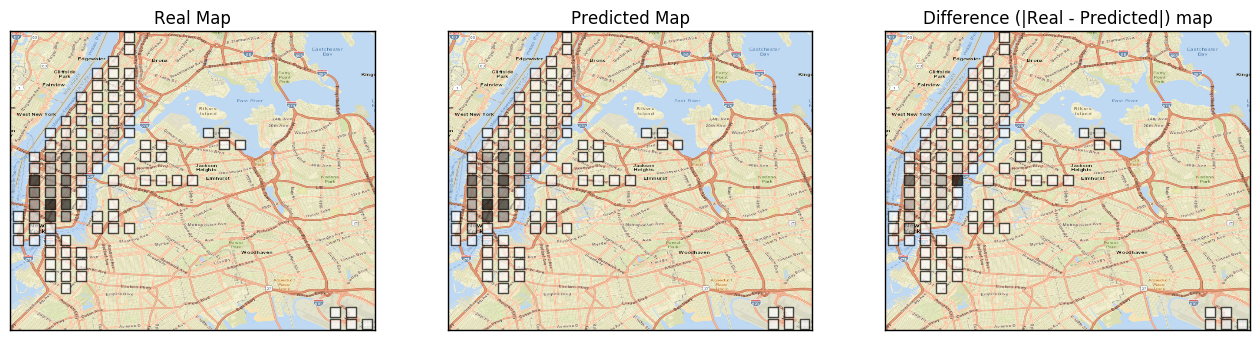

In [6]:
widgets.interact(select_map, date=dates, hour=hours, predhour=predhours)
button = widgets.Button(description="Show Maps")
button.on_click(build_plots)
display(button)

# Временной ряд фактического и прогнозируемого спроса на такси в выбираемой области.

http://server.arcgisonline.com/ArcGIS/rest/services/World_Street_Map/MapServer/export?bbox=-74.0222464,40.6387194,-73.7666796,40.8484244&bboxSR=4326&imageSR=4326&size=1000,820&dpi=96&format=png32&f=image


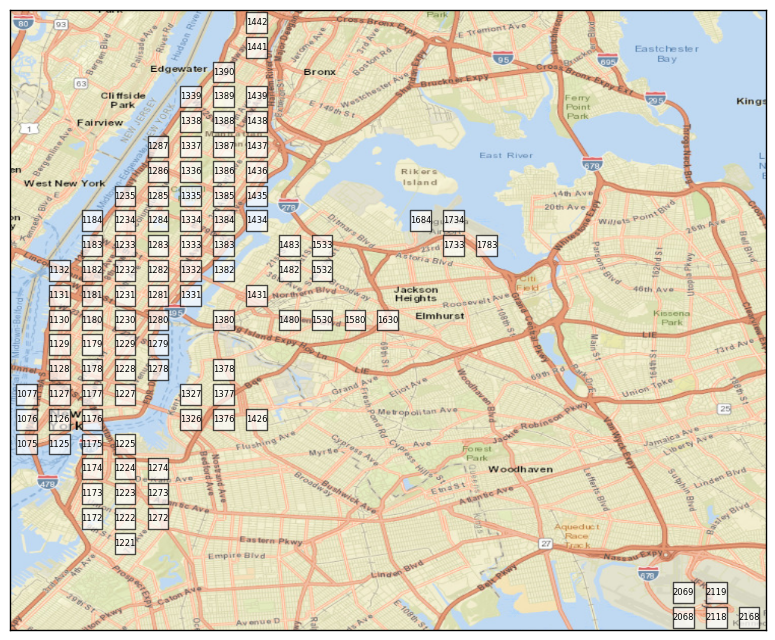

In [7]:
import matplotlib.font_manager as font_manager
font_prop = font_manager.FontProperties(size=6)
map4 = Basemap(llcrnrlon=-74.0222464,llcrnrlat=40.6387194,urcrnrlon=-73.7666796,urcrnrlat=40.8484244)
figsize(11,8)
all_data_reg = []
for r in reg102[1].index:  
    y= (rs[rs.region==reg102[1][r]].values[0][1]+rs[rs.region==reg102[1][r]].values[0][2])/2
    x= (rs[rs.region==reg102[1][r]].values[0][3]+rs[rs.region==reg102[1][r]].values[0][4])/2
    all_data_reg.append((reg102[1][r],x,y, rs[rs.region==reg102[1][r]].values[0][3], rs[rs.region==reg102[1][r]].values[0][4], rs[rs.region==reg102[1][r]].values[0][1],rs[rs.region==reg102[1][r]].values[0][2]))
    region_data = pd.DataFrame(data=all_data_reg, columns=["region","lat_center", "lon_center","lat_min","lat_max","lon_min","lon_max"])
region_data["const"]=1.
x, y = map4(region_data['lon_center'].values,region_data['lat_center'].values)

map4.scatter(x,y, 220, marker='s', c=region_data["const"], cmap=cm.Greys, alpha=0.7)
for i in range(len(x)):
    plt.text(x[i],y[i],region_data['region'].loc[i], fontproperties=font_prop, verticalalignment='center', horizontalalignment='center',)
map4.arcgisimage(service='World_Street_Map', xpixels = 1000, verbose= True)

plt.show()

Временные ряды фактического и прогнозируемого спроса на такси в выбираемой области сделаны в шести варианта (для каждого следующего часа прогноза).
Чтобы увидеть графики:
- выберете номер интересующего региона (это можно сделать ориентируясь по карте выше); 
- час на который ожидаете увидеть предсказание (1-6);
- число часов, которые хотите видеть концами истории (всего 715)

Результат:
- черная линия - врменной ряд фактического спроса в выбранной области на выбранный час предсказания вперед 
- красная линия - врменной ряд прогнозируемого спроса в выбранной области на выбранный час предсказания вперед 

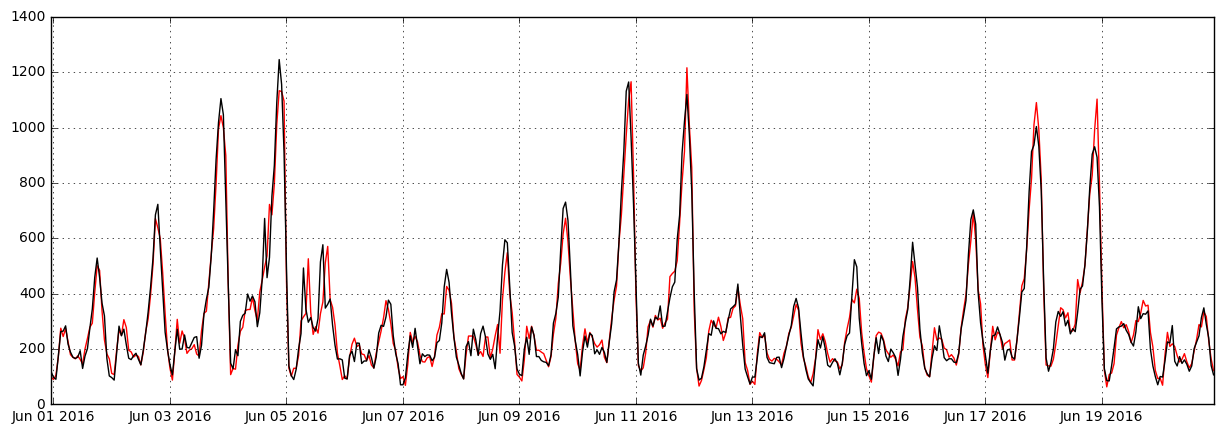

In [8]:
widgets.interact(f, RegionNumber=namereg, HourPredict =(1,6), CountHoursForDisplay=(0, 715, 1))